In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [2]:
with_mask_file = os.listdir('face/with_mask/')
print(with_mask_file[:5])
print(with_mask_file[-5:])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']
['with_mask_995.jpg', 'with_mask_996.jpg', 'with_mask_997.jpg', 'with_mask_998.jpg', 'with_mask_999.jpg']


In [3]:
without_mask_file = os.listdir('face/without_mask/')
print(without_mask_file[:5])
print(without_mask_file[-5:])

['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']
['without_mask_995.jpg', 'without_mask_996.jpg', 'without_mask_997.jpg', 'without_mask_998.jpg', 'without_mask_999.jpg']


In [4]:
print(len(with_mask_file))
print(len(without_mask_file))

3725
3828


In [5]:
with_mask_label = [1]*len(with_mask_file)
without_mask_label = [0]*len(without_mask_file)

In [6]:
print(with_mask_label[:5])
print(without_mask_label[:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [7]:
labels = with_mask_label + without_mask_label

print(labels[:5])
print(labels[-5:])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


(174, 122, 3)

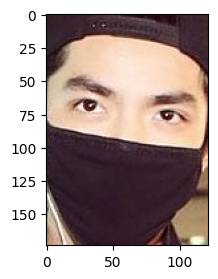

In [12]:
plt.figure(figsize=(3,3))
img = mpimg.imread('face/with_mask/with_mask_999.jpg')
imgplot = plt.imshow(img)
img.shape

(433, 327, 3)

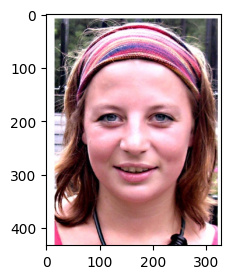

In [13]:
plt.figure(figsize=(3,3))
img = mpimg.imread('face/without_mask/without_mask_996.jpg')
imgplot = plt.imshow(img)
img.shape

In [15]:
with_mask_path = 'face/with_mask/'

data = []

for img_file in with_mask_file:
    image = Image.open(with_mask_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.asarray(image)
    data.append(image)


without_mask_path = 'face/without_mask/'

for img_file in without_mask_file:
    image = Image.open(without_mask_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.asarray(image)
    data.append(image)

c:\Users\Abubakr\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [16]:
type(data)

list

In [17]:
len(data)

7553

In [18]:
data[0]

array([[[50, 58, 31],
        [46, 55, 33],
        [56, 58, 42],
        ...,
        [27, 32, 25],
        [29, 33, 19],
        [33, 40, 17]],

       [[47, 54, 30],
        [49, 58, 36],
        [59, 63, 40],
        ...,
        [18, 21, 11],
        [37, 42, 31],
        [31, 41, 23]],

       [[51, 58, 37],
        [50, 59, 37],
        [59, 64, 37],
        ...,
        [45, 44, 30],
        [29, 34, 27],
        [20, 30, 18]],

       ...,

       [[63, 73, 37],
        [66, 75, 41],
        [74, 84, 50],
        ...,
        [ 5,  3,  0],
        [20, 19, 14],
        [17, 16, 12]],

       [[58, 72, 34],
        [60, 70, 39],
        [68, 75, 49],
        ...,
        [16, 15, 12],
        [15, 13, 10],
        [13,  9,  7]],

       [[53, 69, 30],
        [53, 64, 37],
        [57, 64, 42],
        ...,
        [18, 18, 16],
        [16, 13, 12],
        [19, 12, 13]]], dtype=uint8)

In [21]:
data[9].shape

(128, 128, 3)

In [22]:
x = np.array(data)
y = np.array(labels)

In [23]:
x.shape,y.shape

((7553, 128, 128, 3), (7553,))

In [24]:
y


array([1, 1, 1, ..., 0, 0, 0])

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2,random_state=2,)

In [26]:
X_train = X_train/255
X_test = X_test/255 

In [27]:
import tensorflow as tf
from tensorflow import keras

In [28]:
num_of_class = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu',))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_class,activation='sigmoid'))

c:\Users\Abubakr\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['acc']
    )

In [31]:
history = model.fit(X_train,Y_train, validation_split=0.1,epochs=10)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 29s 161ms/step - acc: 0.6556 - loss: 0.7454 - val_acc: 0.8909 - val_loss: 0.2836
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 29s 170ms/step - acc: 0.8654 - loss: 0.3377 - val_acc: 0.8893 - val_loss: 0.3158
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 32s 189ms/step - acc: 0.8920 - loss: 0.2777 - val_acc: 0.9223 - val_loss: 0.2296
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 38s 225ms/step - acc: 0.9185 - loss: 0.2100 - val_acc: 0.9273 - val_loss: 0.2193
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 41s 240ms/step - acc: 0.9221 - loss: 0.1976 - val_acc: 0.9240 - val_loss: 0.2328
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 43s 253ms/step - acc: 0.9420 - loss: 0.1444 - val_acc: 0.9240 - val_loss: 0.2114
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 42s 244ms/step - acc: 0.9498 - loss: 0.1315 - val_acc: 0.9207 - val_loss: 0.2527
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 43s 254ms/step - acc: 0.9488 - loss: 0.1303 - val_acc: 0.9289 - val_loss: 0.2521
Epoch 9/10
170/170 ━━━━━━━━━━━━━

In [32]:
loss , accuracy = model.evaluate(X_test,Y_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - acc: 0.9237 - loss: 0.2196


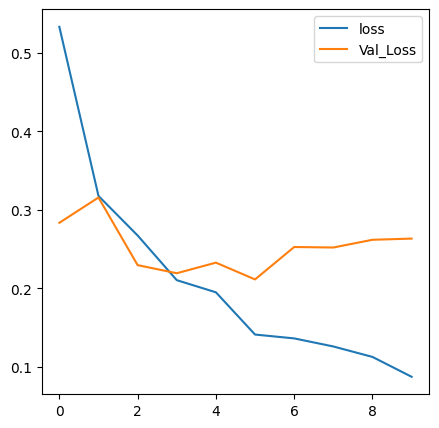

In [46]:
h = history

plt.figure(figsize=(5,5))
plt.plot(h.history['loss'],label = 'loss' )
plt.plot(h.history['val_loss'],label='Val_Loss')
plt.legend()
plt.show()



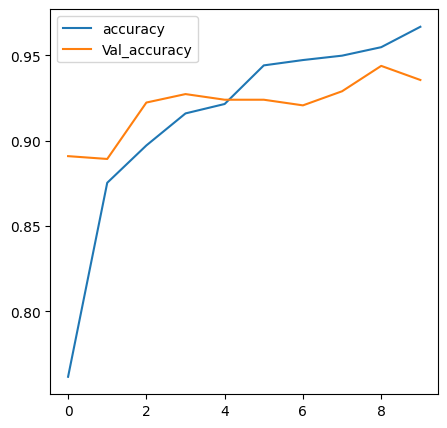

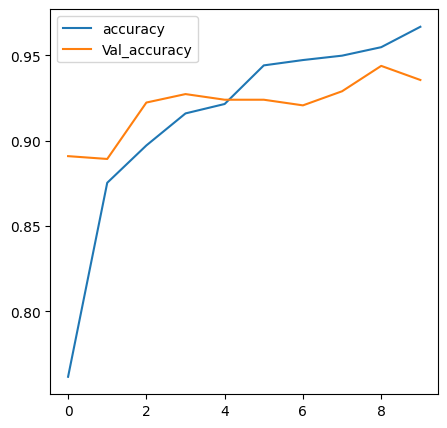

In [77]:
plt.figure(figsize=(5,5))
plt.plot(h.history['acc'],label = 'accuracy' )
plt.plot(h.history['val_acc'],label='Val_accuracy')
plt.legend()
plt.show()

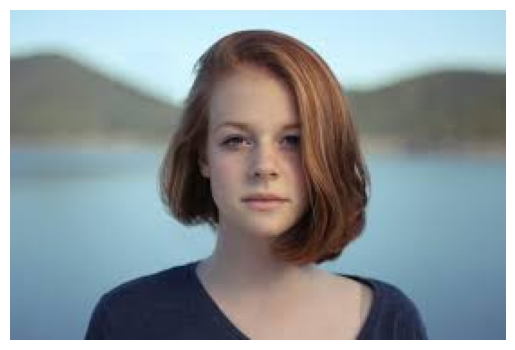

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[[0.7780652  0.18364392]]
0
The Person is not wearing Mask


In [81]:

input_img = input("Enter Image Path : ")
image = cv2.imread(input_img)  # Use '/' or raw string
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)         # Fix color
plt.imshow(image)
plt.axis('off')
plt.show()

image = cv2.resize(image,(128,128))

image = image/255

image = np.reshape(image,[1,128,128,3])

predict = model.predict(image)

print(predict)

predict_label = np.argmax(predict)

print(predict_label)


if predict_label == 1:
    print("The Person is wearing Mask")
else:
     print("The Person is not wearing Mask")